In [1]:
from shapely.geometry.polygon import LineString
from pprint import pprint
import json
from os import environ

import lib.race_line as rl
import lib.optimal as opt

environ["TRACK"] = "circuit"

### Load track

In [2]:
race_line = rl.load(0.8, 10000)

# Convert np array to list and remove last point because it is the same point as the first one

race_track = race_line.tolist()[:-1]

### Calculate optimal speeds

- Change `LOOK_AHEAD_POINTS` to influence how many points the algorithm looks ahead (the higher, the sooner the car will start to break)
- Change `MIN_SPEED` and `MAX_SPEED` to fit the track and model !

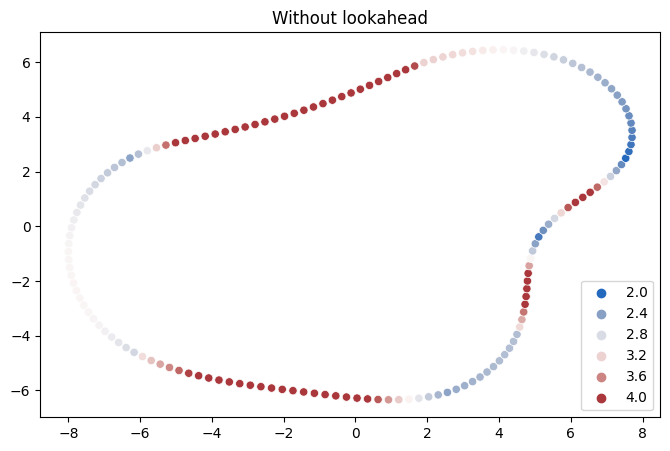

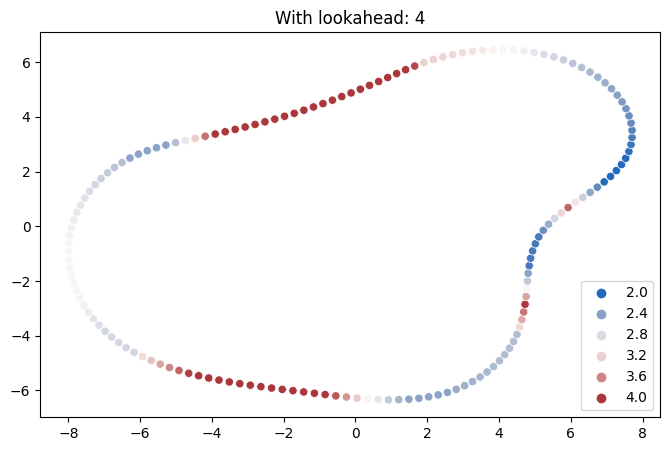

In [3]:
LOOK_AHEAD_POINTS = 4

MIN_SPEED = 2
MAX_SPEED = 4

optimal_speed = opt.speed(race_track, MIN_SPEED, MAX_SPEED, LOOK_AHEAD_POINTS)
optimal_speed_without_lookahead = opt.speed(race_track, MIN_SPEED, MAX_SPEED, 0)

opt.plot_speeds(
    race_track, LOOK_AHEAD_POINTS, optimal_speed, optimal_speed_without_lookahead
)

### Calculate curve type flag

### Calculate optimal time

In [4]:
time_to_prev = opt.time(race_track, optimal_speed)

Total time for track, if racing line and speeds are followed perfectly: 15.416484118964018 s


### Append everything together

In [5]:
race_track_everything = opt.everything(race_track, optimal_speed)

In [6]:
# x, y, optimal speed, is_track_straight, is_track_curved
race_track_everything

[[-2.03946, -5.95965, 4.0, 1.0, 0.0],
 [-1.74092, -6.00694, 4.0, 1.0, 0.0],
 [-1.44231, -6.0543, 4.0, 1.0, 0.0],
 [-1.14374, -6.10194, 4.0, 1.0, 0.0],
 [-0.84521, -6.14976, 4.0, 1.0, 0.0],
 [-0.54735, -6.19659, 3.82444, 1.0, 0.0],
 [-0.25071, -6.24014, 3.50493, 1.0, 0.0],
 [0.04467, -6.27828, 3.24924, 0.0, 0.0],
 [0.33857, -6.30896, 3.0364, 0.0, 0.0],
 [0.63061, -6.33016, 2.85578, 0.0, 0.0],
 [0.92031, -6.34005, 2.69708, 0.0, 0.0],
 [1.20706, -6.33685, 2.55788, 0.0, 1.0],
 [1.49009, -6.31894, 2.4324, 0.0, 1.0],
 [1.7685, -6.28475, 2.4324, 0.0, 1.0],
 [2.04114, -6.23284, 2.4324, 0.0, 1.0],
 [2.30663, -6.16183, 2.4324, 0.0, 1.0],
 [2.56324, -6.07049, 2.4324, 0.0, 1.0],
 [2.80883, -5.95775, 2.49235, 0.0, 1.0],
 [3.04277, -5.82565, 2.51568, 0.0, 1.0],
 [3.26429, -5.6755, 2.53557, 0.0, 1.0],
 [3.47263, -5.50843, 2.55508, 0.0, 1.0],
 [3.66711, -5.32553, 2.57144, 0.0, 1.0],
 [3.84701, -5.12778, 2.58667, 0.0, 1.0],
 [4.01164, -4.9161, 2.60049, 0.0, 1.0],
 [4.16026, -4.69142, 2.60755, 0.0, 1.0]

### Calculate optimal action space

In [7]:
action_space = opt.action_space(race_track, optimal_speed, MIN_SPEED, MAX_SPEED)

In [8]:
action_space

,steering_angle,speed,index
0,-12.2,2.5,0
1,12.6,2.7,1
2,1.6,3.5,2
3,13.1,2.1,3
4,2.0,2.8,4
5,0.7,2.4,5
6,-0.2,4.0,6
7,4.6,3.0,7
8,-11.1,2.1,8
9,10.4,2.5,9


In [9]:
# convert to json for replacing in ec2

pprint(action_space.to_dict(orient="records"))

[{'index': 0, 'speed': 2.5, 'steering_angle': -12.2},
 {'index': 1, 'speed': 2.7, 'steering_angle': 12.6},
 {'index': 2, 'speed': 3.5, 'steering_angle': 1.6},
 {'index': 3, 'speed': 2.1, 'steering_angle': 13.1},
 {'index': 4, 'speed': 2.8, 'steering_angle': 2.0},
 {'index': 5, 'speed': 2.4, 'steering_angle': 0.7},
 {'index': 6, 'speed': 4.0, 'steering_angle': -0.2},
 {'index': 7, 'speed': 3.0, 'steering_angle': 4.6},
 {'index': 8, 'speed': 2.1, 'steering_angle': -11.1},
 {'index': 9, 'speed': 2.5, 'steering_angle': 10.4},
 {'index': 10, 'speed': 3.2, 'steering_angle': -0.9},
 {'index': 11, 'speed': 3.1, 'steering_angle': -14.2},
 {'index': 12, 'speed': 3.7, 'steering_angle': -9.2},
 {'index': 13, 'speed': 2.1, 'steering_angle': 1.3},
 {'index': 14, 'speed': 2.6, 'steering_angle': -0.9},
 {'index': 15, 'speed': 2.9, 'steering_angle': 19.4},
 {'index': 16, 'speed': 3.2, 'steering_angle': 11.4},
 {'index': 17, 'speed': 3.7, 'steering_angle': 8.0},
 {'index': 18, 'speed': 2.9, 'steering_an